In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=1671634f3d87f9a1553d910a6e7777a43b28d6d0c202979294077e7d0c790d07
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=cc79deb318785cd993794d020808a8d595eccaecce1b5a9018955cdc326016bb
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import yfinance as yf
import pandas as pd

In [7]:
TCS = yf.download(tickers='TCS.NS', period = '2y', interval = '1d')['Adj Close']
TCS.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-07-22    2011.661987
2019-07-23    2014.093262
2019-07-24    1999.172241
2019-07-25    2028.823486
2019-07-26    2010.851807
Name: Adj Close, dtype: float64

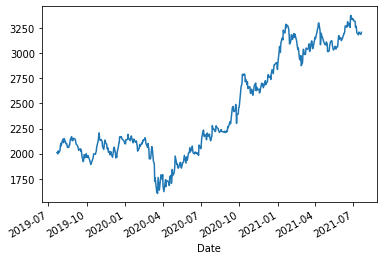

In [8]:
import matplotlib.pyplot as plt
TCS.plot()
plt.show()

In [9]:
pip install Prophet

     |████████████████████████████████| 65 kB 547 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.5 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644024 sha256=00793c390702e54107d41cbb78b7d0aec0b90bcd9d5624c3f204ceb1037159cf
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from fbprophet import Prophet
import warnings
import datetime as dt
warnings.simplefilter(action='ignore',category=FutureWarning)
TCS_price = yf.download(tickers='TCS.NS', period = '20y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
modelfb = Prophet()
TCS_price = TCS_price.reset_index()
TCS_price[['ds','y']] = TCS_price[['Date','Adj Close']]
modelfb.fit(TCS_price)
future = modelfb.make_future_dataframe(periods=180)


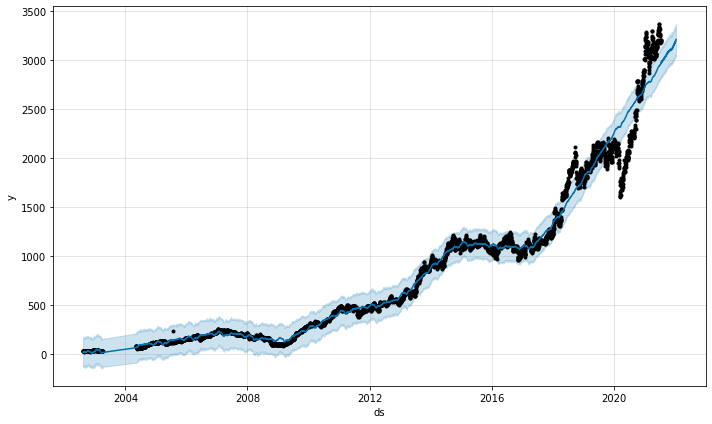

In [12]:
forecast = modelfb.predict(future)
modelfb.plot(forecast)
plt.show()

In [13]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()